<a href="https://colab.research.google.com/github/krystaldowling/MAST30034_Final_Project-/blob/CNN_Model/Standard_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document contains code modified from https://realpython.com/python-keras-text-classification/. 

In [65]:
# Import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [11]:
# Loading in preproccessed data
PATH = "/content/drive/My Drive/Data/"
data = pd.read_csv(PATH + "preproccessed_data.csv", lineterminator='\n')

data

,title,text,label
0,muslims busted stole millions gov ’ benefits,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1
2,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1
3,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1
4,fantastic trumps 7 point plan reform healthcar...,email healthcare reform make america great sin...,1
...,...,...,...
29449,process analytical instruments market – techna...,technavio published new report global process ...,0
29450,travel deals get 1200 air credit two apt cookt...,apt offering savings new cape york outback wil...,0
29451,taiwanese recyclers belief waste simply mispla...,taipei taiwan sept 8 2015 prnewswire recent ye...,0
29452,season curtain raiser ideal way honour john,blackburn sunday league john haydock memorial ...,0


In [60]:
# Performing test-train split
text_train, text_test, y_train, y_test = train_test_split(data['text'].values, data['label'].values, test_size=0.25, random_state=1000)

In [15]:
# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])
 
maxlen = max_length(data['text'])

In [61]:
# Tokenizing data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(str(text_train))

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

# Vocab size- adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1  

In [62]:
# Padding sequences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
# Function to print plot of accuracy and loss of training and test data
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [19]:
# Setting embedding dimensions
embedding_dim = 100

# Creating model
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2202, 100)         19272700  
_________________________________________________________________
conv1d (Conv1D)              (None, 2198, 128)         64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 19,338,129
Trainable params: 19,338,129
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9991
Testing Accuracy:  0.8707


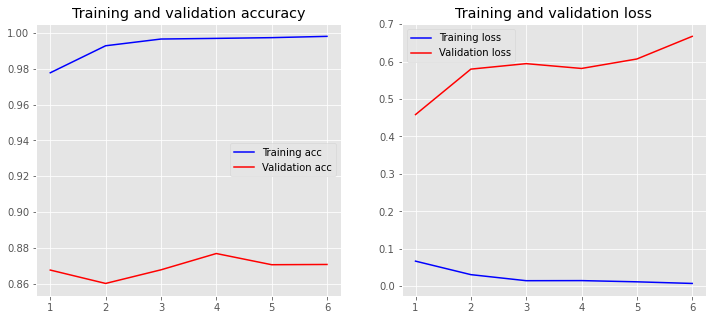

In [22]:
# Fitting Model
history = model.fit(X_train, y_train,
                    epochs =4,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=16)


In [66]:
# Using code modified from https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
import numpy as np
pred = model.predict(X_test, verbose = 0)
pred = np.rint(pred)

# Evaluate model on training data
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Train Accuracy: %f' % (accuracy*100))
 
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Accuracy: %f' % (accuracy*100))

# Precision Score
precision = precision_score(y_test, pred)
print('Test Precision: %f' % (precision*100))

# Recall Score
recall = recall_score(y_test, pred)
print('Test Recall: %f' % (recall*100))

# F1 Score
f1 = f1_score(y_test, pred)
print('Test F1 score: %f' % (f1*100))
       

Train Accuracy: 49.877772
Test Accuracy: 49.660510
Test Precision: 45.711079
Test Recall: 89.880202
Test F1 score: 60.601552


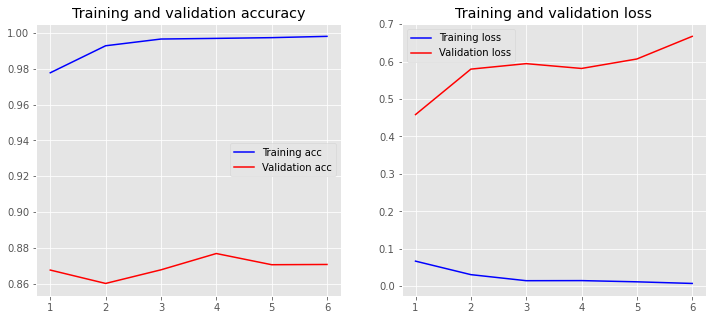

In [67]:
# Plot graphs of test/training accuracy and loss
plot_history(history)